# Networkx Basics

Tutorial from https://networkx.org/documentation/stable/tutorial.html

Use networkx to create a graph. Go through the basics.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Nodes

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1) # add a node

In [4]:
G.add_nodes_from([2,3])

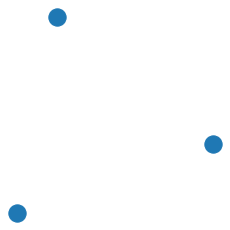

In [5]:
plt.figure(figsize = (3,3))
nx.draw(G)

In [6]:
H=nx.path_graph(10)

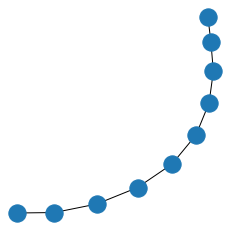

In [7]:
plt.figure(figsize = (3,3))
nx.draw(H) # sw: H is another graph.

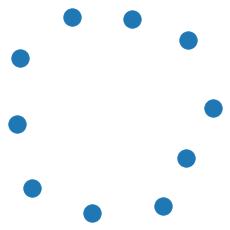

In [8]:
G.add_nodes_from(H) # add Graph H to Graph G.
plt.figure(figsize = (3,3))
nx.draw(G)

In [9]:
G.add_node(H) # Here G contains H as a node. It represents graphs of graphs. 

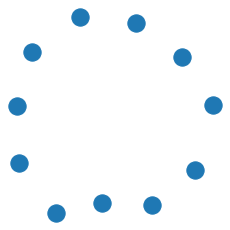

In [10]:
plt.figure(figsize = (3,3))
nx.draw(G)

## Edges

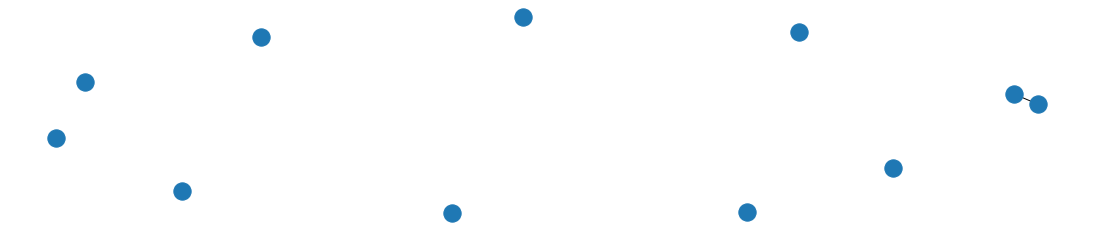

In [11]:
G.add_edge(1,2) # sw: add an edge between 1 and 2.
plt.figure(figsize = (15,3))
nx.draw(G)

In [12]:
e = (2,3)

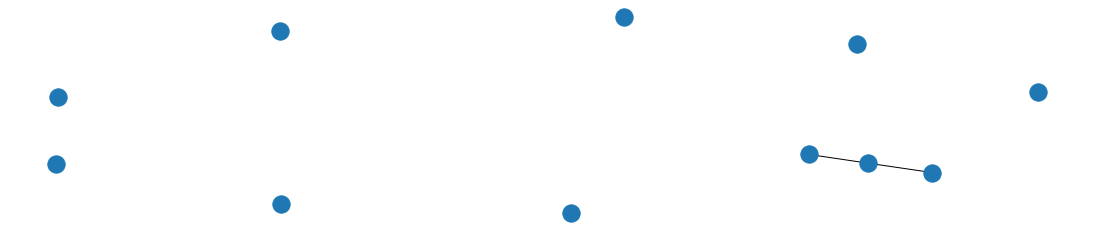

In [13]:
G.add_edge(*e) # unpack edge tuple* # sw: add an edge between 2 and 3.
plt.figure(figsize = (15,3))
nx.draw(G)

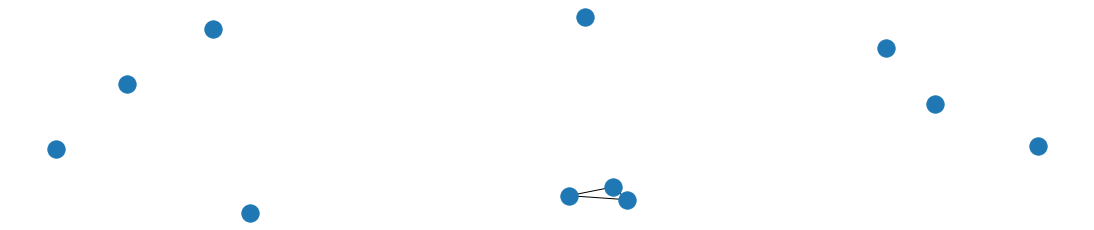

In [50]:
G.add_edges_from([(1,2),(1,3)])
plt.figure(figsize = (15,3))
nx.draw(G)

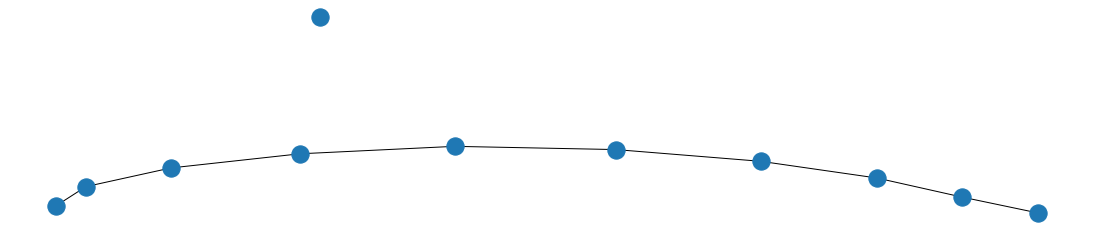

In [14]:
G.add_edges_from(H.edges()) # add the edges from Graph H.
plt.figure(figsize = (15,3))
nx.draw(G)

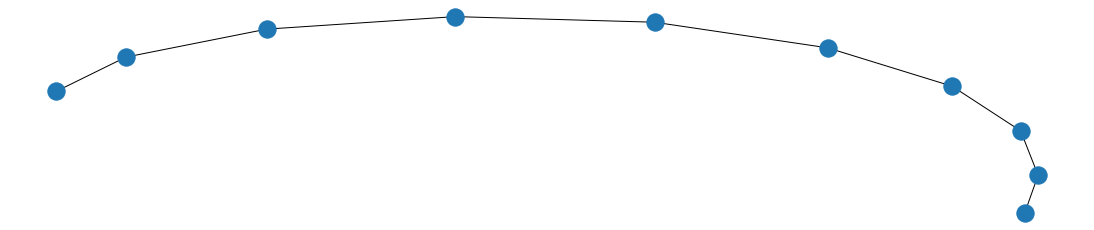

In [15]:
G.remove_node(H) # remove the H node
plt.figure(figsize = (15,3))
nx.draw(G)

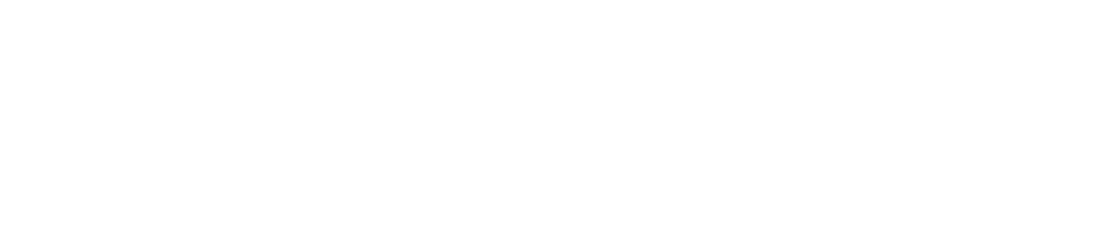

In [19]:
G.clear()
plt.figure(figsize = (15,3))
nx.draw(G)

In [20]:
# add things back
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam") # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

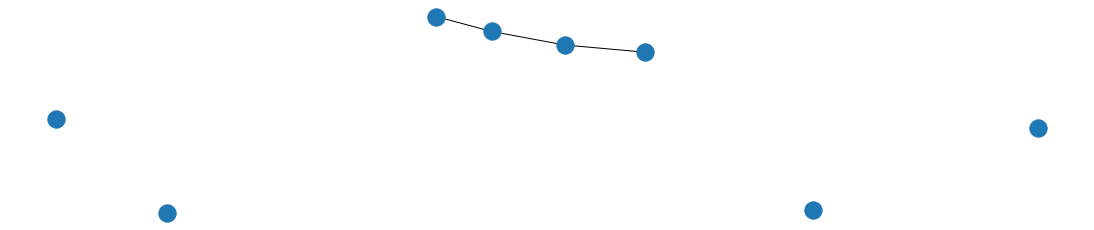

In [21]:
plt.figure(figsize = (15,3))
nx.draw(G)

## Examining elements of a graph

In [22]:
G.number_of_nodes()

8

In [23]:
G.number_of_edges()

3

In [24]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [25]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [26]:
list(G.adj[1])

[2, 3]

In [27]:
G.degree[1] # the number of edges incident to 1

2

In [28]:
G.edges([2, 'm']) # report edges of 2 and 'm'

EdgeDataView([(2, 1), ('m', 3)])

In [29]:
G.degree([2, 3]) # report degrees of the two nodes

DegreeView({2: 1, 3: 2})

## Removing elements from a graph

In [30]:
G.remove_node(2)
G.remove_nodes_from("spam")
G.remove_edge(1, 3)

In [31]:
list(G.nodes)

[1, 3, 'spam']

## Skip a few things...

## Adding attributes to graphs, nodes, and edges

In [32]:
# Add graph attributes
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [33]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [34]:
# Add node attributes
G.add_node(1, time='5pm') # sw: add node 1 with attribute 'time' = '5pm'
G.add_nodes_from([3], time='2pm') # sw: add node 3 with attribute 'time' = '2pm'
print(G.nodes[1])
G.nodes[1]['room'] = 714
print(G.nodes.data())
# sw: it leads to a hierarchy of dictionaries.

{'time': '5pm'}
[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]


In [35]:
# add edge attributes
G.add_edge(1, 2, weight=4.7) # sw: add edge between 1 and 2 with 'weight' = 4.7
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
print(G.nodes.data())
print(G.edges.data())
# sw: both nodes and edges have a lot of info. 
# Networks are much more complex than simple adjacency matrices.


[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'}), (2, {}), (4, {}), (5, {})]
[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


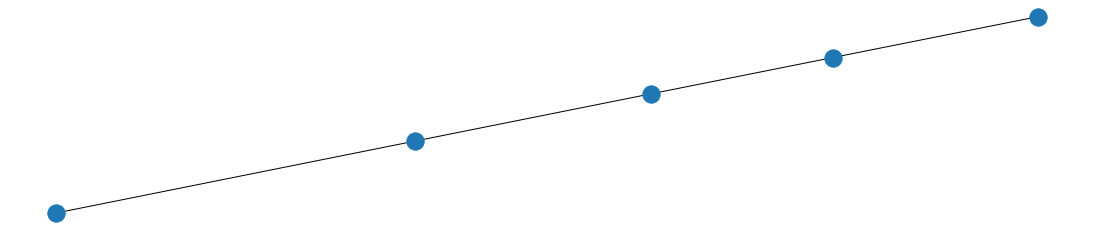

In [128]:
plt.figure(figsize = (15,3))
nx.draw(G)
# sw: visualization of the graph is very simple. But the dictionary is much more complex!

In [119]:
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [120]:
print(G.nodes.data())
print(G.edges.data())

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'}), (2, {}), (4, {}), (5, {})]
[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


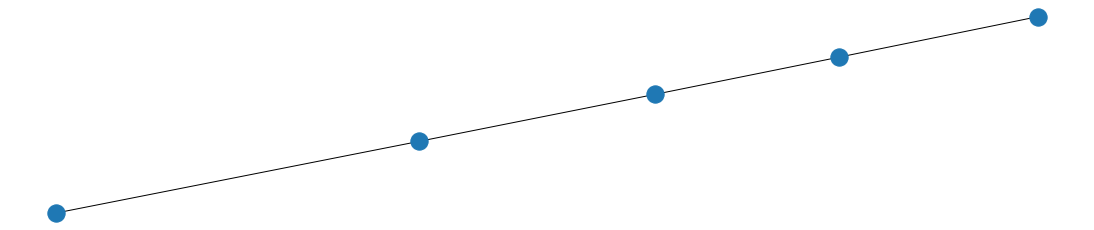

In [127]:
plt.figure(figsize = (15,3))
nx.draw(G) 

## Directed graphs

In [129]:
DG = nx.DiGraph()

DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

DG.out_degree(1, weight='weight')

0.5

In [130]:
DG.degree(1, weight='weight')

1.25

In [131]:
list(DG.successors(1))

[2]

In [132]:
list(DG.neighbors(1))

[2]

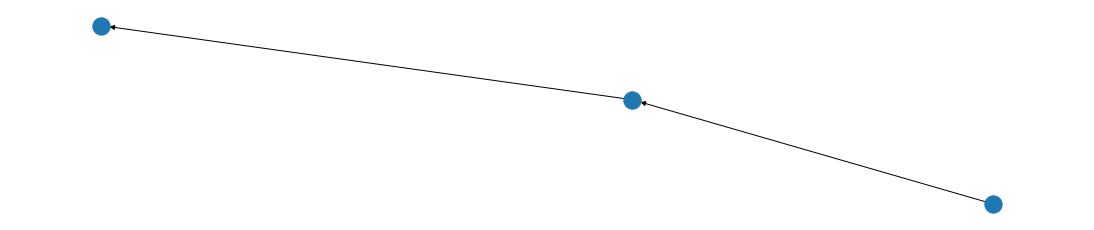

In [134]:
plt.figure(figsize = (15,3))
nx.draw(DG)

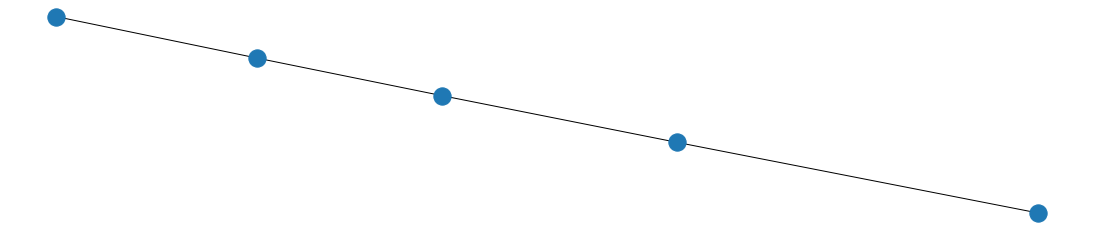

In [136]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G
plt.figure(figsize = (15,3))
nx.draw(H)

## Multigraphs

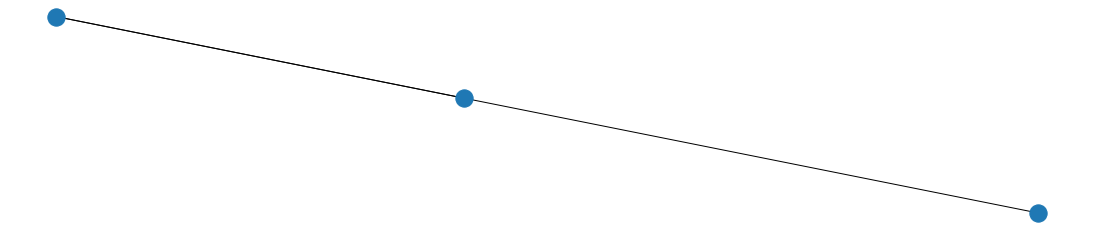

In [140]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)]) # add weights to edges
dict(MG.degree(weight='weight'))
plt.figure(figsize = (15,3))
nx.draw(MG)

In [141]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3) # identify the shortest path.

[1, 2, 3]

{1: 1.0, 2: 0.5, 3: 0.5}

## Drawing graphs

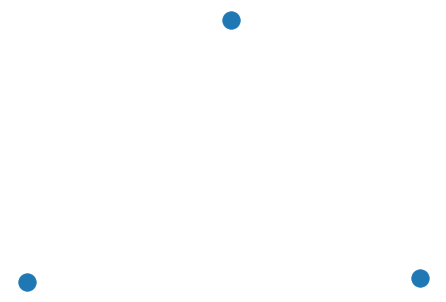

In [11]:
nx.draw(G)

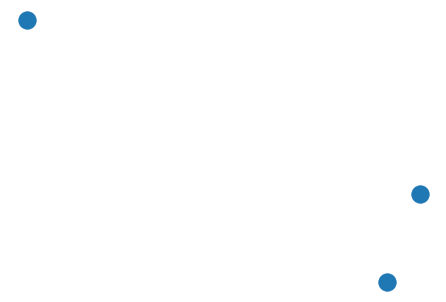

In [15]:
nx.draw_random(G)

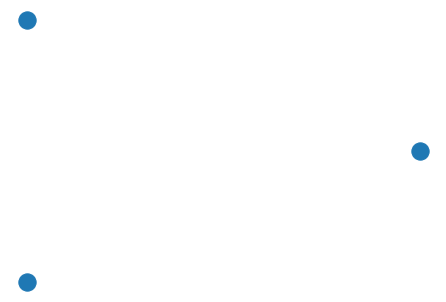

In [18]:
nx.draw_circular(G)

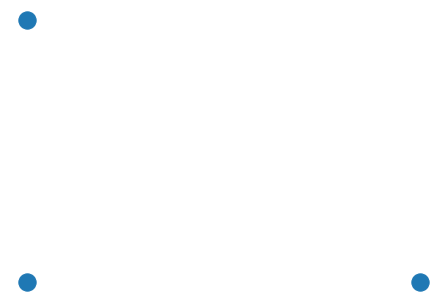

In [19]:
nx.draw_spectral(G)